In [93]:
from colors import *

In [94]:
# from matplotlib import rc
# rc('text', usetex=True)
# rc('text.latex', preamble=[r'\usepackage{sansmath}', r'\sansmath']) #r'\usepackage{DejaVuSans}'
# # rc('text.latex', preamble= r"\usepackage {DejaVuSans}" )#'\usepackage{DejaVuSans}'

# rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans']})

# rc('xtick.major', pad=12)
# rc('ytick.major', pad=12)
# rc('grid', linewidth=1.3)
from matplotlib import rc

# rc('text', usetex=True)
rc('text', usetex=False)

rc('text.latex', preamble=r'\usepackage{sansmath} \sansmath')  # Combine the commands into a single string

rc('font', **{'family': 'sans-serif', 'sans-serif': ['DejaVu Sans']})

rc('xtick.major', pad=12)
rc('ytick.major', pad=12)
rc('grid', linewidth=1.3)


In [95]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(2)
num_samples = 1000
xx = np.random.normal(loc=0.0, scale=1.0, size=num_samples) + 1.0

train_xx = xx[:40]
test_xx = xx[40:]

In [96]:
def get_log_ml(x, alpha_2, mu):
    N = len(x)
    cov_mat = np.eye(N) + alpha_2 * np.ones((N, N))
    inv_cov = np.eye(N) - np.ones((N, N)) / (1/alpha_2 + N)
    log_ml = - N/2 * np.log(2 * np.pi) - 0.5 * np.log(np.linalg.det(cov_mat))
    log_ml += -0.5 * np.matmul(np.matmul((x - mu).T, inv_cov), (x - mu))
    
    return log_ml

In [97]:
def get_likelihood(xx_train, xx_test, alpha2):
    N = len(xx_train)
    map_mean = xx_train.mean() / (1/alpha2 + N)
    log_lik = - N/2 * np.log(2 * np.pi) - 0.5 * ((xx_test - map_mean)**2).sum()
    return log_lik 


def get_pos_dist(xx_train, alpha_2, mu):
    N = len(xx_train)
    pos_mean = 1/ (1/alpha_2 + N) * (xx_train.sum() + mu / alpha_2)
    pos_var = 1/ (1/alpha_2 + N)
    return pos_mean, pos_var

def pred_dist(xx_train, alpha_2, mu):
    N = len(xx_train)
    pred_mean = (1/ (1/alpha_2 + N)) * (xx_train.sum() + mu / alpha_2)
    pred_var = 1 + 1 / (1/alpha_2 + N)
    return pred_mean, pred_var
    
def get_log_pred(x_test, x_train, alpha_2, mu):
#     N = len(x_test)
#     pred_mean, pred_var = pred_dist(x_train, alpha_2, mu)
#     log_pred = - N/2 * np.log(2 * np.pi) - 0.5 * np.log(np.linalg.det(pred_var))
#     log_pre += -0.5 * np.matmul(np.matmul((x_test - pred_var).T, np.linalg.inv(pred_var)), (x_test - pred_var))
#     N = len(x_test)
#     assert N==1
    pred_mean, pred_var = pred_dist(x_train, alpha_2, mu)
#     print(pred_mean, pred_var)
    log_pred = - 0.5 * np.log(2 * np.pi) - 0.5 * np.log(pred_var)
    log_pred -= 0.5/pred_var * ((x_test - pred_mean)**2)
    
    return log_pred.sum()

In [98]:
import seaborn as sns

sns.set_style("whitegrid")

mu = 0.0
# mu = np.mean(train_xx) + 0. 

mll = []
pos_means = []
pos_vars = []
pred_means = []
pred_vars = []
pred_ll = []

alpha_range = np.arange(0.1, 1000, 0.1)
# alpha_range = np.arange(0.1, 1, 0.01)

for alpha2 in alpha_range:
    mll.append(get_log_ml(train_xx, alpha2, mu=mu))
    pos_m, pos_v = get_pos_dist(train_xx, alpha2, mu)
    pred_m, pred_v = pred_dist(train_xx, alpha2, mu)
    pos_means.append(pos_m)
    pos_vars.append(pos_v)
    pred_means.append(pred_m)
    pred_vars.append(pred_v)
#     pred_ll.append(get_log_pred(test_xx[6], train_xx, alpha2, mu))
    pred_ll.append(get_log_pred(test_xx, train_xx, alpha2, mu))

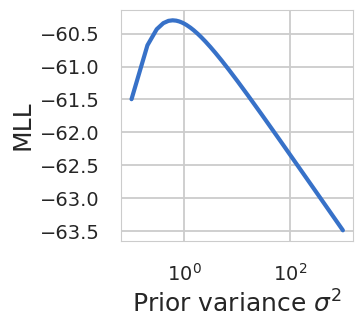

In [99]:
from matplotlib.ticker import StrMethodFormatter

fig, ax = plt.subplots(figsize=(3, 3))
cmap = sns.cubehelix_palette(as_cmap=True)


plt.plot(alpha_range, mll, color=color12, lw=3)
plt.xlabel(r'Prior variance $\sigma^2$',fontsize=18)
plt.ylabel(r'MLL',fontsize=18)
# ax.set_yticks([-79, -77, -75, -73])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xscale("log")

# plt.savefig('../../Papers/marginal_likelihood/figures/generative_model/mll.pdf', bbox_inches="tight")
plt.show()

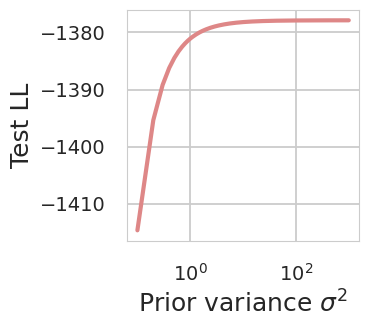

In [100]:
from matplotlib.ticker import StrMethodFormatter

fig, ax = plt.subplots(figsize=(3, 3))
cmap = sns.cubehelix_palette(as_cmap=True)


plt.plot(alpha_range, pred_ll, color=color5, lw=3)
plt.xlabel(r'Prior variance $\sigma^2$',fontsize=18)
plt.ylabel(r'Test LL',fontsize=18)
# ax.set_yticks([-79, -77, -75, -73])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xscale("log")

# plt.savefig('../../Papers/marginal_likelihood/figures/generative_model/test_ll.pdf', bbox_inches="tight")
plt.show()

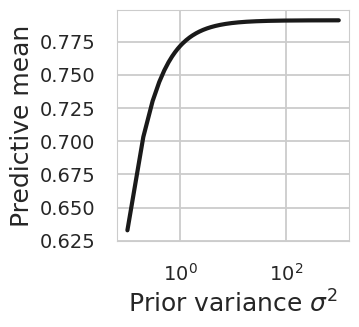

In [101]:
from matplotlib.ticker import StrMethodFormatter

fig, ax = plt.subplots(figsize=(3, 3))
cmap = sns.cubehelix_palette(as_cmap=True)


plt.plot(alpha_range, pred_means, label=r"Predictive $\mu$", color=color2, lw=3)
plt.xlabel(r'Prior variance $\sigma^2$',fontsize=18)
plt.ylabel(r'Predictive mean',fontsize=18)
# ax.set_yticks([-79, -77, -75, -73])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xscale("log")

# plt.savefig('../../Papers/marginal_likelihood/figures/generative_model/predictive_mu.pdf', bbox_inches="tight")
plt.show()

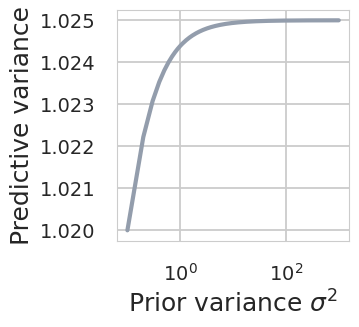

In [102]:
from matplotlib.ticker import StrMethodFormatter

fig, ax = plt.subplots(figsize=(3, 3))
cmap = sns.cubehelix_palette(as_cmap=True)


plt.plot(alpha_range, pred_vars, label=r"Predictive $\mu$", color=color3, lw=3)
plt.xlabel(r'Prior variance $\sigma^2$',fontsize=18)
plt.ylabel(r'Predictive variance',fontsize=18)
# ax.set_yticks([-79, -77, -75, -73])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xscale("log")

# plt.savefig('../../Papers/marginal_likelihood/figures/generative_model/predictive_sigma.pdf', bbox_inches="tight")
plt.show()

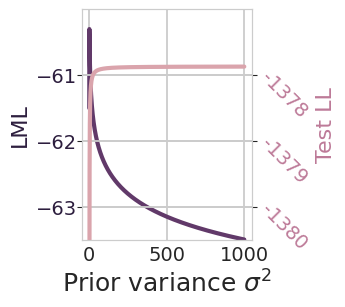

In [103]:
# Ensure that mll and pred_ll are calculated correctly based on alpha_range
# mll = compute_mll(alpha_range)  # Ensure this function returns the same number of values
# pred_ll = compute_pred_ll(alpha_range)  # Same here

# Now plot them
fig, ax = plt.subplots(figsize=(2.2, 3))

l1 = ax.plot(alpha_range, mll, label="LML", color=sanae_colors[4], lw=3)
ax.set_xlabel(r'Prior variance $\sigma^2$', fontsize=18)
ax.set_yticks([-61, -62, -63])
ax.set_ylim(-63.5, -60)
ax.set_ylabel("LML", fontsize=16, color=sanae_colors[5])
plt.yticks(color=sanae_colors[5])

ax2 = ax.twinx()
l2 = ax2.plot(alpha_range, pred_ll, color=sanae_colors[1], label="Predictive LL", lw=3)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))  # 2 decimal places
plt.yticks(color=sanae_colors[2])
lns = l1+l2
labs = [l.get_label() for l in lns]
ax2.set_yticks([-1380, -1379, -1378])
ax2.set_yticklabels(["-1380", "-1379", "-1378"], rotation=-45)
ax2.set_ylim(-1380.5, -1377)
ax2.set_ylabel("Test LL", fontsize=16, color=sanae_colors[2])

ax.set_xticks([0, 500, 1000])
ax.tick_params(axis='both', which='major', labelsize=14, pad=0)
ax2.tick_params(axis='both', which='major', labelsize=14, pad=0)
# ax2.legend(lns, labs, loc=1, prop={'size': 18}, framealpha=1.)

# plt.savefig('../../Papers/marginal_likelihood/figures/generative_model/gen_model_mll.pdf', bbox_inches="tight")
plt.show()

# Continue with the rest of your plotting code...


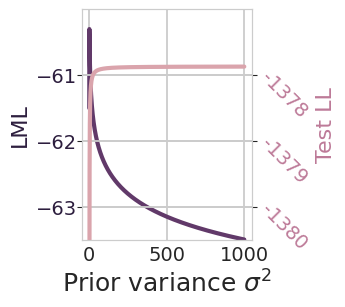

In [104]:
from matplotlib.ticker import StrMethodFormatter

fig, ax = plt.subplots(figsize=(2.2, 3))
cmap = sns.cubehelix_palette(as_cmap=True)
# color1 = sns.color_palette("Paired")[1]
# color2 = sns.color_palette("Paired")[5]


l1 = ax.plot(alpha_range, mll, label="LML", color=sanae_colors[4], lw=3)
ax.set_xlabel(r'Prior variance $\sigma^2$', fontsize=18)
ax.set_yticks([-61, -62, -63])
ax.set_ylim(-63.5, -60)
ax.set_ylabel("LML", fontsize=16, color=sanae_colors[5])
plt.yticks(color=sanae_colors[5])

ax2=ax.twinx()
l2 = ax2.plot(alpha_range, pred_ll, color=sanae_colors[1], label="Predictive LL", lw=3)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.yticks(color=sanae_colors[2])
lns = l1+l2
labs = [l.get_label() for l in lns]
ax2.set_yticks([-1380, -1379, -1378])
ax2.set_yticklabels(["-1380", "-1379", "-1378"], rotation=-45)
ax2.set_ylim(-1380.5, -1377)
ax2.set_ylabel("Test LL", fontsize=16, color=sanae_colors[2])

ax.set_xticks([0, 500, 1000])
ax.tick_params(axis='both', which='major', labelsize=14, pad=0)
ax2.tick_params(axis='both', which='major', labelsize=14, pad=0)
# ax2.legend(lns, labs, loc=1, prop={'size': 18}, framealpha=1.)

# plt.savefig('../../Papers/marginal_likelihood/figures/generative_model/gen_model_mll.pdf', bbox_inches="tight")
plt.show()

mll,  -60.35
pred,  (0.7717638255717766, 1.024390243902439)
mll,  -66.94
pred,  (0.7910579264346228, 1.024999999375)
mll,  -66.32
pred,  (0.477621626155526, 1.018421052631579)


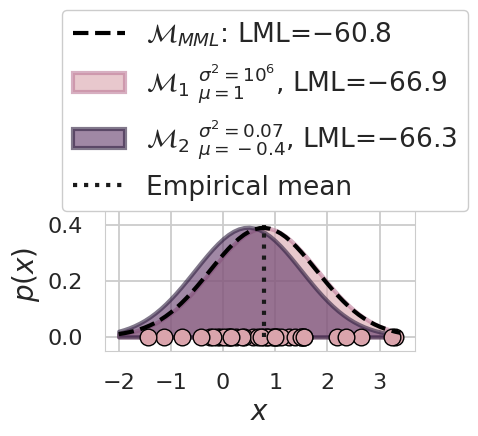

In [105]:
import scipy
fig, ax = plt.subplots(figsize=(4., 2))
# col1 = sns.color_palette("Paired")[7]
# col2 = sns.color_palette("Paired")[3]
val = 0. 
plt.plot(train_xx, np.zeros_like(train_xx) + val, 'o', color=sanae_colors[1], markeredgecolor="k", ms=12)
x_values = np.arange(-2, 3.5, 0.1)

alpha_2 = 1.#1.e-16
# mu = np.mean(train_xx)
mll = np.round(get_log_ml(train_xx, alpha_2, mu),2)
print("mll, ", mll)
print("pred, ",  pred_dist(train_xx, alpha_2, mu))

pred_m, pred_v = pred_dist(train_xx, alpha_2, mu)
y_values = scipy.stats.norm(pred_m, pred_v)
plt.plot(x_values, y_values.pdf(x_values),
         label=r"$\mathcal{M}_{MML}$: LML=$-60.8$",
         color="k", linestyle="dashed", lw=3, zorder=3)


alpha_2 = 1e6
mu = 1.0
mll = np.round(get_log_ml(train_xx, alpha_2, mu),2)
print("mll, ", mll)
print("pred, ",  pred_dist(train_xx, alpha_2, mu))
pred_m, pred_v = pred_dist(train_xx, alpha_2, mu)
y_values = scipy.stats.norm(pred_m, pred_v)
# plt.plot(x_values, y_values.pdf(x_values),
#          label=r"$\mathcal{M}_2: \sigma^2 = 10^6$, $\mu=1$, MLL=$-66.9$",
#          color=color5, lw=3)
plt.fill_between(x_values,
                 y_values.pdf(x_values),
                 np.zeros_like(x_values),
#                  color=color5, 
                 facecolor=sanae_colors[1],
                 edgecolor=sanae_colors[2],
                 label=r"$\mathcal{M}_1~ ^{\sigma^2 = 10^6}_{\mu=1}$, LML=$-66.9$",
                 alpha=0.6, lw=3)

alpha_2 = .07
mu = -0.4
mll = np.round(get_log_ml(train_xx, alpha_2, mu),2)
print("mll, ", mll)
print("pred, ",  pred_dist(train_xx, alpha_2, mu))
pred_m, pred_v = pred_dist(train_xx, alpha_2, mu)
y_values = scipy.stats.norm(pred_m, pred_v)
# plt.plot(x_values, y_values.pdf(x_values),
#          label=r"$\mathcal{M}_1: \sigma^2 = 0.07$, $\mu=2$, MLL=$-66.5$",
#          color=color1, lw=3)
plt.fill_between(x_values,
                 y_values.pdf(x_values),
                 np.zeros_like(x_values),
                 facecolor=sanae_colors[4],
                 edgecolor=sanae_colors[5],
                 alpha=0.6, lw=3,
                 label=r"$\mathcal{M}_2~ ^{\sigma^2 = 0.07}_{\mu=-0.4}$, LML=$-66.3$",
                )

plt.vlines(np.mean(train_xx), 0, 0.4, linestyle="dotted", color=color2, label="Empirical mean", lw=3)

plt.ylim(-0.05, 0.5)
ax.set_xlabel(r'$x$',fontsize=20)
# plt.plot([pred_m, pred_m], [0.0, y_values.pdf(x_values).max()], color=col2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=19, framealpha=1., bbox_to_anchor=(-.18,2.3), loc="upper left") #(0.))
plt.ylabel(r"$p(x)$", fontsize=20)

# plt.tight_layout()
# plt.savefig('../../Papers/marginal_likelihood/figures/generative_model/gen_model_mismatch.pdf',
            # bbox_inches="tight")
plt.show()

## Learning curve

In [106]:
test_xx.mean()

0.9588622374545618

In [107]:
train_xx

array([ 0.58324215,  0.94373317, -1.1361961 ,  2.64027081, -0.79343559,
        0.15825263,  1.50288142, -0.24528809, -0.05795222,  0.09099239,
        1.55145404,  3.29220801,  1.04153939, -0.11792545,  1.53905832,
        0.4038403 ,  0.9808695 ,  2.17500122,  0.25212905,  1.00902525,
        0.12189211,  0.84356583,  1.25657045,  0.01122095,  0.66117803,
        0.76381597,  0.36234499, -0.18761229, -0.42121723,  0.8465048 ,
        0.73094304,  3.23136679, -1.43476758,  1.1127265 ,  1.37044454,
        2.35963386,  1.50185721,  0.1557863 ,  1.00000976,  1.54235257])

In [108]:
get_log_pred(test_xx, train_xx[:5], 1., train_xx.mean()) / len(test_xx)

-1.515105099674512

In [109]:
get_log_pred(test_xx, train_xx[:0], 1.e6, 1.0) / len(test_xx)

-7.826694815542727

In [110]:
get_log_pred(test_xx, train_xx[:0], .07, -.5) / len(test_xx)

-2.416926762676778

In [111]:
def get_learning_curve(alpha_2, mu, n_orders=100):
    order_lls = []
    for _ in range(n_orders):
        order = np.arange(len(train_xx))
        np.random.shuffle(order)
        order_lls.append(
            np.array([get_log_pred(test_xx, train_xx[order[:i]], alpha_2, mu).copy() / len(test_xx)
             for i in range(len(order))]))
    return np.stack(order_lls)

In [112]:
# M_MML
alpha_2 = 1.#e-16
mu = np.mean(train_xx)
mml_learning_curve = get_learning_curve(alpha_2, mu).mean(axis=0)

# M_1
alpha_2 = 1e6
mu = 1.0
m1_learning_curve = get_learning_curve(alpha_2, mu).mean(axis=0)

# M_2
alpha_2 = .07
mu = -0.4
m2_learning_curve = get_learning_curve(alpha_2, mu).mean(axis=0)

In [113]:
# mml_learning_curve[0, :] - mml_learning_curve[1, :]

/tmp/ipykernel_704330/4202109111.py:11: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:


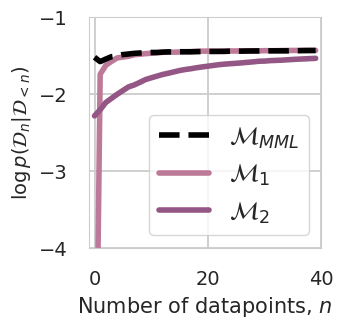

In [123]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(3., 3.))
plt.plot(mml_learning_curve, "--k", label=r"$\mathcal{M}_{MML}$", lw=4, zorder=4)
plt.plot(m1_learning_curve, label=r"$\mathcal{M}_1$", lw=4, color=sanae_colors[2])
plt.plot(m2_learning_curve, label=r"$\mathcal{M}_2$", lw=4, color=sanae_colors[3])
# plt.plot(mml_learning_curve, "--k", label="MML Model", lw=4, zorder=4)
# plt.plot(m1_learning_curve, label="Model 1", lw=4, color=sanae_colors[2])
# plt.plot(m2_learning_curve, label="Model 2", lw=4, color=sanae_colors[3])
leg = plt.legend(handlelength=2, fontsize=18, loc=4)
for legobj in leg.legendHandles:
    legobj.set_linewidth(4)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlim(-1, 40)
plt.ylim(-4, -1)
plt.ylabel("$\log p(\mathcal{D}_n | \mathcal{D}_{<n}$)", fontsize=14)
plt.xlabel("Number of datapoints, $n$", fontsize=15)

# plt.savefig("../../Papers/marginal_likelihood/figures/generative_model/learning_curve.pdf", bbox_inches="tight")
plt.show()

In [115]:
# from matplotlib import rc

# rc('text', usetex=True)
# rc('text.latex', preamble=r'\usepackage{amsmath}')  # Include amsmath package
# f = plt.figure(figsize=(3., 3.))

# plt.plot(mml_learning_curve, "--k", label=r"$\mathcal{M}_{MML}$", lw=4, zorder=4)
# plt.plot(m1_learning_curve, label=r"$\mathcal{M}_1$", lw=4, color=sanae_colors[2])
# plt.plot(m2_learning_curve, label=r"$\mathcal{M}_2$", lw=4, color=sanae_colors[3])
# leg = plt.legend(handlelength=2, fontsize=18, loc=4)
# for legobj in leg.legendHandles:
#     legobj.set_linewidth(4)

# f.get_axes()[0].tick_params(axis='both', which='major', labelsize=14)
# plt.xlim(-1, 40)
# plt.ylim(-4, -1)
# plt.ylabel(r"$p(\mathcal{D}_n \vert \mathcal D_{<n})$", fontsize=18)
# plt.xlabel(r"Number of datapoints, $n$", fontsize=18)

# # plt.savefig("../../Papers/marginal_likelihood/figures/generative_model/learning_curve.pdf",
# #            bbox_inches="tight")
# plt.show()



Text(0.5, 0, 'Number of datapoints, $n$')

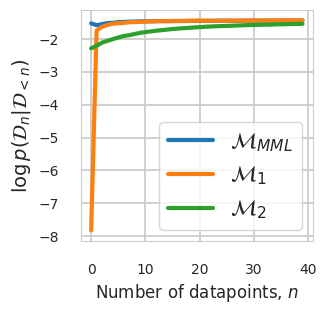

In [124]:
plt.figure(figsize=(3, 3))
plt.plot(mml_learning_curve, label="$\mathcal{M}_{MML}$", lw=3)
plt.plot(m1_learning_curve, label="$\mathcal{M}_1$", lw=3)
plt.plot(m2_learning_curve, label="$\mathcal{M}_2$", lw=3)
plt.legend(fontsize=16)
# plt.ylim(-.6, -.42)
plt.ylabel("$\log p(\mathcal{D}_n | \mathcal{D}_{<n}$)", fontsize=14)
plt.xlabel("Number of datapoints, $n$", fontsize=12)

In [117]:
m1_learning_curve

array([-7.82669482, -1.74495183, -1.62801252, -1.57727837, -1.53235448,
       -1.52152202, -1.51089211, -1.49144547, -1.48535717, -1.47681426,
       -1.4720238 , -1.46645069, -1.45971147, -1.45724293, -1.45839071,
       -1.45560698, -1.45270165, -1.44999299, -1.44659564, -1.44444601,
       -1.44427004, -1.44451472, -1.44404295, -1.44265537, -1.44211819,
       -1.44281991, -1.44176747, -1.44089317, -1.44142463, -1.44057909,
       -1.43828586, -1.4389381 , -1.4387496 , -1.43677848, -1.43551012,
       -1.43575237, -1.43555629, -1.43461621, -1.4346145 , -1.43522527])

In [118]:
alpha_2 = 1.0
mu = 2.0
mll = np.round(get_log_ml(train_xx, alpha_2, mu),2)
print("mll, ", mll)
print("pred, ",  pred_dist(train_xx, alpha_2, mu))
x_values = np.arange(-2, 6, 0.1)
pred_m, pred_v = pred_dist(train_xx, alpha_2, mu)
pred_m

mll,  -60.76
pred,  (0.8205443133766547, 1.024390243902439)


0.8205443133766547

In [119]:
alpha_mlls = {
    alpha: [] for alpha in [0.6, 10., 1.e6]
}
all_mlls = []
n_orders = 100

for alpha_2 in alpha_mlls:
    for order in range(n_orders):
        order = np.arange(len(train_xx))
        np.random.shuffle(order)
        x_ = train_xx[order]
        mlls = np.array([
            get_log_ml(x_[:i], alpha_2, 0.) for i in range(1, len(x_))])
        alpha_mlls[alpha_2].append(mlls)
    alpha_mlls[alpha_2] = np.array(alpha_mlls[alpha_2])

In [120]:
np.savez("data/mll_gen.npz",
        **{str(k): v for (k, v) in alpha_mlls.items()})

In [121]:
alpha_mlls[0.6].shape

(100, 39)